In [19]:
# Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Name of the CSV file
data = 'final_data.csv'

In [21]:
#Put into data frame
data_df = pd.read_csv(data)

In [22]:
data_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


In [24]:
data_df.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,198.000000,1.980000e+02,198.000000,198.000000,198.000000,198.000000,198.000000
mean,2012.757576,1.281608e+06,2.780667,6.226263,216.883838,142.728773,142.548611
std,4.779591,2.465078e+05,0.564286,2.138199,31.076188,5.039555,8.583734
min,2005.000000,5.631220e+05,1.687000,3.500000,160.000000,132.069000,121.887000
25%,2009.000000,1.139623e+06,2.305250,4.600000,195.075000,137.720500,138.002250
50%,2013.000000,1.317078e+06,2.716500,5.400000,213.800000,145.378500,140.773500
75%,2017.000000,1.472140e+06,3.235000,7.875000,233.650000,146.859000,148.869500
max,2021.000000,2.115420e+06,4.062000,14.800000,352.500000,154.680000,197.227000


The lower quartile of sales is: 1139623.0
The upper quartile of sales is: 1472139.75
The interquartile range of sales is: 332516.75
The median of sales is: 1317078.0 
The mean of sales is: 1281607.6666666667 
Values below 640847.875 could be outliers.
Values above 1970914.875 could be outliers.


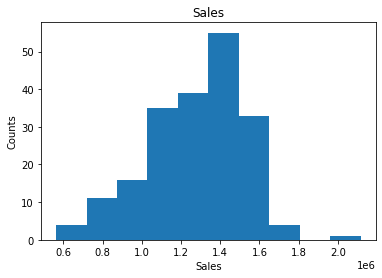

In [25]:
# Create empty list to fill 

sales = data_df["Sales"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = sales.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=data_df['Sales'].mean()

print(f"The lower quartile of sales is: {lowerq}")
print(f"The upper quartile of sales is: {upperq}")
print(f"The interquartile range of sales is: {iqr}")
print(f"The median of sales is: {quartiles[0.5]} ")
print(f"The mean of sales is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(data_df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Counts')
plt.title('Sales')
plt.savefig('Images/Sales Histogram.png', dpi=100)
plt.show()

In [26]:
sales = data_df["Sales"].tolist()

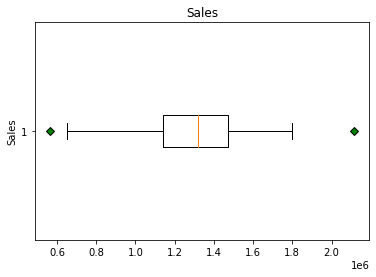

In [27]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Sales')
ax1.set_ylabel('Sales')
ax1.boxplot(sales, vert=False, flierprops=green_diamond)
plt.show()

In [28]:
# Determine outliers using upper and lower bounds
quartiles1 = data_df['Sales'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
sales_outliers=data_df[(data_df["Sales"]< lower_bound1) |
                                (data_df["Sales"]> upper_bound1)]
sales_outliers

640847.875 - 1970914.875


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
85,Feb-2012,2012,2115420.0,3.579,8.3,253.8,143.838,149.893
183,Apr-2020,2020,563122.0,1.841,14.8,204.7,146.393,137.532


In [33]:
sales_wo_outliers=data_df[(data_df["Sales"]>= lower_bound1) &
                                (data_df["Sales"]<= upper_bound1)]
sales_wo_outliers

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.500,138.600
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.600,138.400
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.300,138.300
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.300,138.400
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.700,138.800
...,...,...,...,...,...,...,...,...
193,Feb-2021,2021,1256529.0,2.501,6.2,260.5,148.587,150.370
194,Mar-2021,2021,1536038.0,2.810,6.0,289.6,148.550,151.197
195,Apr-2021,2021,1493938.0,2.858,6.1,322.8,149.267,166.374
196,May-2021,2021,1502642.0,2.985,5.8,331.3,151.693,178.505


In [34]:
sales_wo_outliers.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,196.000000,1.960000e+02,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2012.724490,1.281019e+06,2.781388,6.171939,216.757653,142.704418,142.536735
std,4.775537,2.348965e+05,0.560257,2.053484,31.110583,5.057849,8.604090
min,2005.000000,6.506080e+05,1.687000,3.500000,160.000000,132.069000,121.887000
25%,2009.000000,1.140435e+06,2.307750,4.600000,194.975000,137.700000,138.060750
50%,2013.000000,1.317078e+06,2.716500,5.400000,213.800000,145.378500,140.773500
75%,2017.000000,1.471429e+06,3.219000,7.800000,233.550000,146.871500,148.784500
max,2021.000000,1.795944e+06,4.062000,13.300000,352.500000,154.680000,197.227000


In [35]:
sales_wo_outliers.to_csv("final_sales_data.csv",encoding="utf-8", index=False, header=True)